In [1]:
import pandas as pd
import matplotlib.pyplot as plt        
Data= pd.read_excel('DS1_C4_S5_Car_Data_Challenge.xlsx')

In [2]:
Data.head()

,isker,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# TASK1

Max mileage by city car maufacturer is:  Mahindra


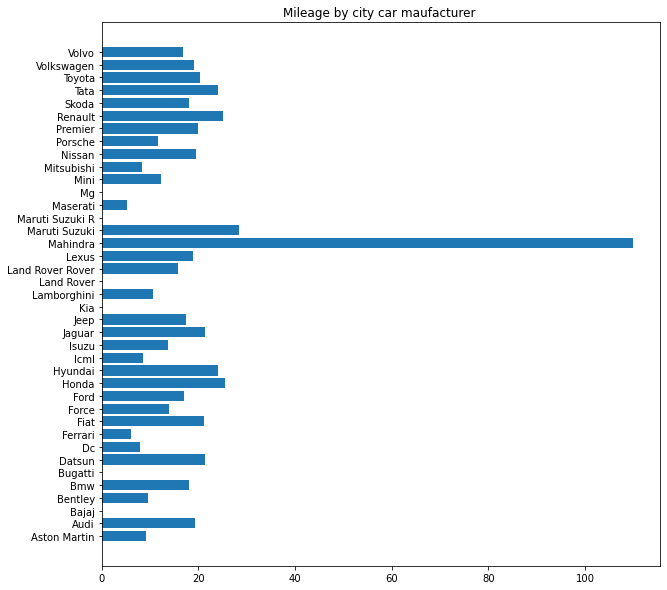

In [4]:
A= Data.groupby('Make')['City_Mileage_km_litre'].max()
#A.sort_values(ascending=False)
print('Max mileage by city car maufacturer is: ',A.idxmax())
plt.figure(figsize=(10,10))
plt.barh(A.index, A)                                        # To plot the graph
plt.title("Mileage by city car maufacturer ")
plt.show() 

# Task2

In [6]:
B= A.sort_values(ascending=False).head(10)

In [7]:
B

Make
Mahindra         110.00
Maruti Suzuki     28.40
Honda             25.50
Renault           25.17
Tata              24.12
Hyundai           24.00
Datsun            21.38
Jaguar            21.27
Fiat              21.20
Toyota            20.32
Name: City_Mileage_km_litre, dtype: float64

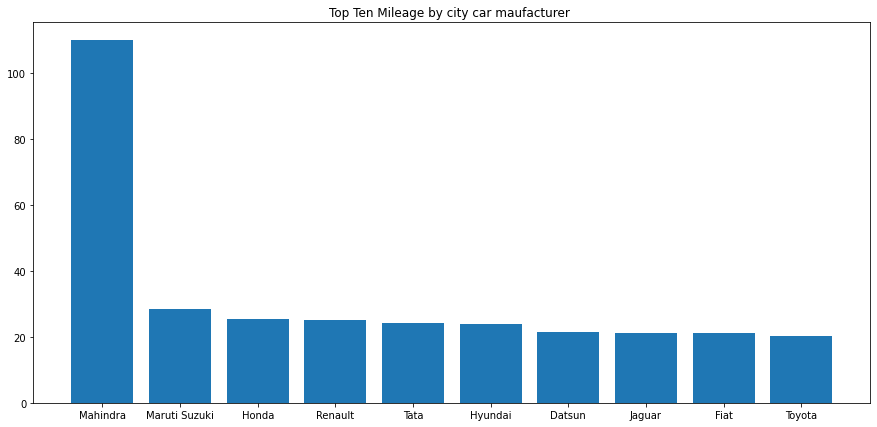

In [8]:
plt.figure(figsize=(15,7))
plt.bar(B.index, B)                                        # To plot the graph
plt.title("Top Ten Mileage by city car maufacturer ")
plt.show() 

# TASK3

In [10]:
C= Data.groupby('Body_Type')['isker'].count()
print('Most Prefered body type of any car is: ', C.idxmax())

Most Prefered body type of any car is:  SUV


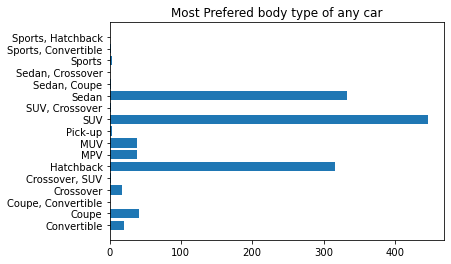

In [11]:
#plt.figure(figsize=(15,7))
plt.barh(C.index, C)                                        # To plot the graph
plt.title("Most Prefered body type of any car")
plt.show() 

# TASK3 cntd

In [13]:
print("Count of Cars by body type of car")
C

Count of Cars by body type of car


Body_Type
Convertible             20
Coupe                   41
Coupe, Convertible       1
Crossover               18
Crossover, SUV           2
Hatchback              316
MPV                     39
MUV                     39
Pick-up                  3
SUV                    447
SUV, Crossover           2
Sedan                  333
Sedan, Coupe             2
Sedan, Crossover         1
Sports                   3
Sports, Convertible      2
Sports, Hatchback        1
Name: isker, dtype: int64

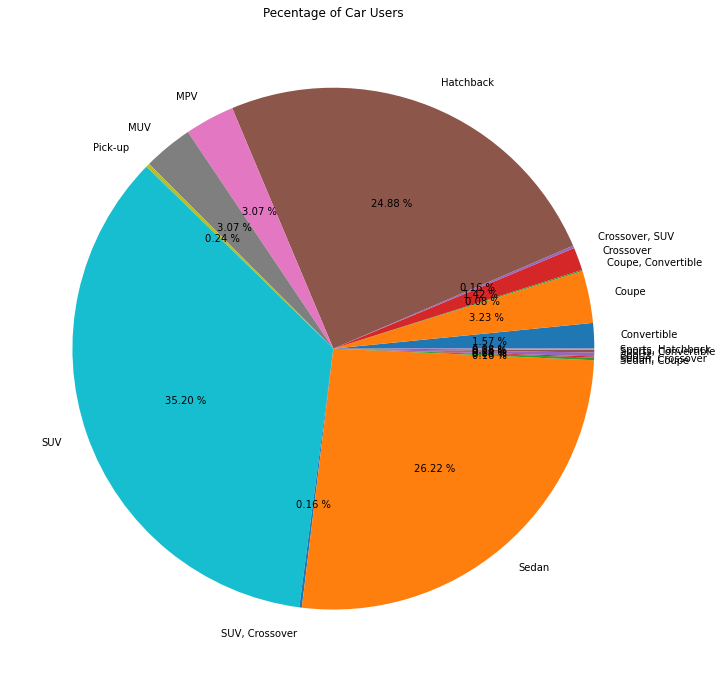

In [14]:
plt.figure(figsize=(20,12))
plt.pie(C, labels=C.index, autopct='%.2f %%')                                        # To plot the graph
plt.title("Pecentage of Car Users")
plt.show() 

# Task4

In [16]:
A=Data[['Make','City_Mileage_km_litre','Highway_Mileage_km_litre']][(Data['Make']=='Mahindra')| (Data['Make']=='Renault')  | (Data['Make']=='Hyundai') | (Data['Make']=='Skoda')]

In [17]:
Mode = lambda x:x.mode().iloc[0]
X = A.pivot_table(index = 'Make', aggfunc = (['mean','median',Mode])).rename(columns ={'<lambda>':'Mode','median':'Median', 'mean':'Mean'})

In [18]:
X

Mean                                         Median  \
         City_Mileage_km_litre Highway_Mileage_km_litre City_Mileage_km_litre   
Make                                                                            
Hyundai              16.679853                18.294146                 16.38   
Mahindra             20.003763                18.140175                 16.00   
Renault              20.554286                17.690000                 21.04   
Skoda                13.953333                17.268529                 14.50   

                                                   Mode  \
         Highway_Mileage_km_litre City_Mileage_km_litre   
Make                                                      
Hyundai                     18.50                 13.30   
Mahindra                    17.21                 16.00   
Renault                     19.60                 25.17   
Skoda                       16.00                 12.00   

                                   
         Highway_Mileage_km_litre  
Make                               
Hyundai                     18.50  
Mahindra                    18.15  
Renault                     19.60  
Skoda                       18.19

In [19]:
#plt.figure(figsize=(18,8))
#X.boxplot()

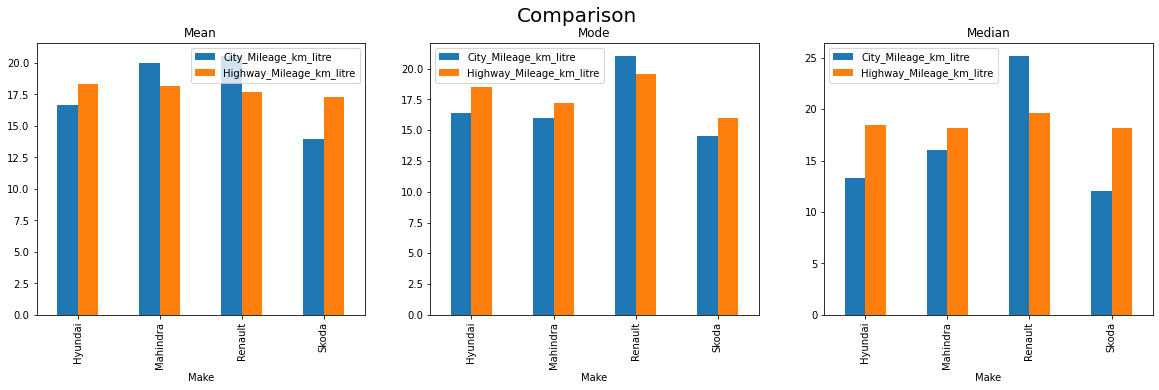

In [20]:


fig, ((ax1), (ax2),(ax3))=plt.subplots(nrows=1,ncols=3,figsize=(20,5))
fig.suptitle('Comparison', fontsize=20 )

X.Mean.plot.bar(ax=ax1 ,title="Mean")
X.Median.plot.bar(ax=ax2,title="Mode")
X.Mode.plot.bar(ax=ax3,title="Median")
plt.show()


# TASK5

In [22]:
A=Data[['Make','City_Mileage_km_litre','Highway_Mileage_km_litre']][(Data['Make']=='Mahindra') | (Data['Make']=='Toyota') | (Data['Make']=='Volkswagen') | (Data['Make']=='Hyundai')]
A[['Make','City_Mileage_km_litre','Highway_Mileage_km_litre']].pivot_table(index = 'Make', aggfunc = (['mean','median']))

mean                           \
           City_Mileage_km_litre Highway_Mileage_km_litre   
Make                                                        
Hyundai                16.679853                18.294146   
Mahindra               20.003763                18.140175   
Toyota                 14.293065                18.448750   
Volkswagen             16.225000                19.229333   

                          median                           
           City_Mileage_km_litre Highway_Mileage_km_litre  
Make                                                       
Hyundai                    16.38                   18.500  
Mahindra                   16.00                   17.210  
Toyota                     13.60                   17.935  
Volkswagen                 15.30                   20.000

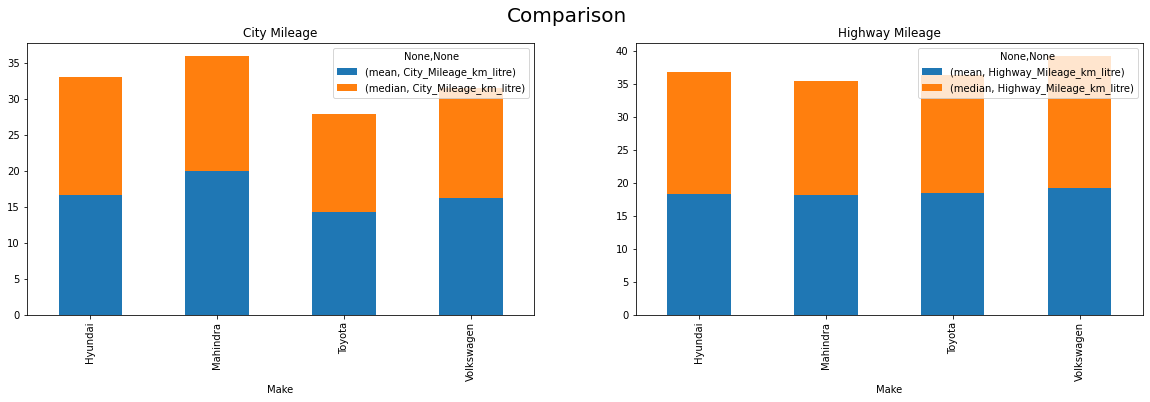

In [23]:
a=A[['Make','City_Mileage_km_litre']].pivot_table(index = 'Make', aggfunc = (['mean','median']))
b=A[['Make','Highway_Mileage_km_litre']].pivot_table(index = 'Make', aggfunc = (['mean','median']))
fig, (ax1, ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
fig.suptitle('Comparison', fontsize=20 )
a.plot.bar(ax=ax1 , stacked=True,title="City Mileage")
b.plot.bar(ax=ax2, stacked=True,title="Highway Mileage")
plt.show()


# Task6

In [25]:
Data.insert(3,'Mileage',(Data['City_Mileage_km_litre']+Data['Highway_Mileage_km_litre'])/2)

A= Data[['Make','City_Mileage_km_litre','Highway_Mileage_km_litre']]
import numpy as np
A.insert(3,'Mileage',(Data['City_Mileage_km_litre']+Data['Highway_Mileage_km_litre'])/2)

A.sample(10)

,Make,City_Mileage_km_litre,Highway_Mileage_km_litre,Mileage
740,Honda,NaN,NaN,NaN
1012,Hyundai,13.10,14.60,13.850
253,NaN,11.50,15.00,13.250
449,Icml,8.60,11.12,9.860
683,Mahindra,16.00,NaN,NaN
1134,Hyundai,15.29,NaN,NaN
1190,Mahindra,13.80,17.21,15.505
928,Nissan,18.00,NaN,NaN
63,Maruti Suzuki,23.00,22.00,22.500
703,Toyota,11.20,NaN,NaN


In [26]:
A.groupby('Make')['Mileage'].mean()

Make
Aston Martin         8.750000
Audi                11.992857
Bajaj                     NaN
Bentley              6.430000
Bmw                 14.641429
Bugatti                   NaN
Datsun              22.690000
Dc                   9.000000
Ferrari              5.610000
Fiat                16.131818
Force               15.500000
Ford                10.681250
Honda               17.800000
Hyundai             17.284359
Icml                 9.860000
Isuzu               10.800000
Jaguar              10.824444
Jeep                12.950000
Kia                       NaN
Lamborghini          4.833333
Land Rover                NaN
Land Rover Rover     9.773125
Lexus                     NaN
Mahindra            16.647719
Maruti Suzuki       19.718636
Maruti Suzuki R           NaN
Maserati             5.433333
Mg                        NaN
Mini                13.050000
Mitsubishi           8.734167
Nissan              17.500714
Porsche              8.235714
Premier             15.475000
Renau

In [27]:
B = A.groupby('Make')['Mileage'].mean().sort_values(ascending = False)
B.dropna()

Make
Datsun              22.690000
Maruti Suzuki       19.718636
Tata                19.372727
Volkswagen          17.864667
Honda               17.800000
Nissan              17.500714
Hyundai             17.284359
Toyota              17.087000
Mahindra            16.647719
Fiat                16.131818
Renault             15.856111
Skoda               15.762167
Force               15.500000
Premier             15.475000
Volvo               15.445000
Bmw                 14.641429
Mini                13.050000
Jeep                12.950000
Audi                11.992857
Jaguar              10.824444
Isuzu               10.800000
Ford                10.681250
Icml                 9.860000
Land Rover Rover     9.773125
Dc                   9.000000
Aston Martin         8.750000
Mitsubishi           8.734167
Porsche              8.235714
Bentley              6.430000
Ferrari              5.610000
Maserati             5.433333
Lamborghini          4.833333
Name: Mileage, dtype: float64

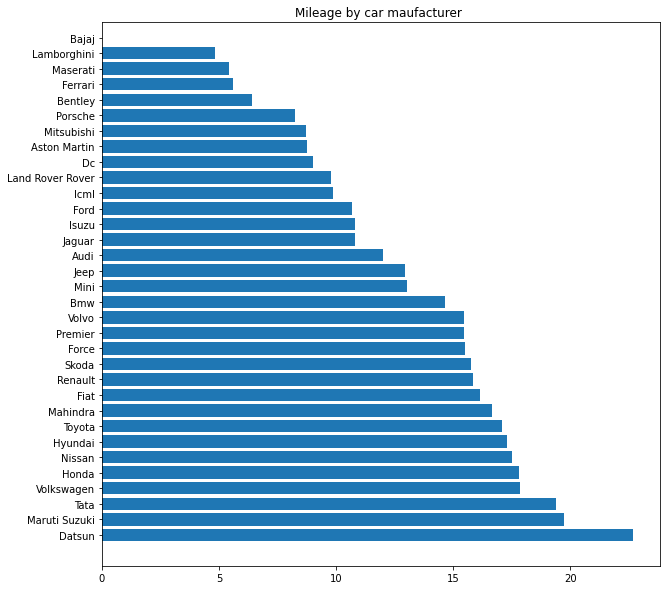

In [28]:
plt.figure(figsize=(10,10))
plt.barh(B.index, B)                                        # To plot the graph
plt.title("Mileage by car maufacturer ")
plt.show() 

# TASK7

In [30]:
Data.groupby('Displacement')['Fuel_Tank_Capacity_litre'].mean().sort_values(ascending = False).dropna()

Displacement
4367.0    105.000000
6749.0    100.000000
2925.0     96.500000
6417.0     93.500000
3604.0     93.500000
             ...    
796.0      35.083333
1047.0     35.000000
998.0      34.716981
799.0      28.000000
624.0      22.500000
Name: Fuel_Tank_Capacity_litre, Length: 121, dtype: float64

In [31]:
A=Data[['Fuel_Tank_Capacity_litre','Displacement','Make']].groupby(by=(['Make','Displacement'])).mean().sort_values(by= 'Fuel_Tank_Capacity_litre',ascending = False).head(10)
A

Fuel_Tank_Capacity_litre
Make             Displacement                          
Land Rover Rover 4367.0                           105.0
                 1997.0                            95.0
Jeep             2987.0                            93.5
                 3604.0                            93.5
                 6417.0                            93.5
Toyota           4461.0                            93.0
Lexus            4461.0                            93.0
                 5700.0                            93.0
Ferrari          3855.0                            92.0
                 6496.0                            92.0

In [32]:
Lst = []
for i in A.index:
    Lst.append(i[1])

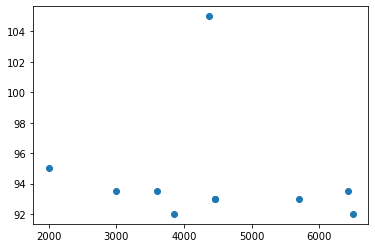

In [33]:
plt.scatter(Lst,A['Fuel_Tank_Capacity_litre'])
plt.show()

# TASK8`

In [35]:
Data.groupby('Mileage')['Fuel_Tank_Capacity_litre'].mean()

Mileage
3.000      90.000000
4.000      90.000000
4.300      90.000000
4.350      80.666667
4.380     100.000000
             ...    
23.785     35.000000
23.850     40.000000
23.920     35.000000
24.000     43.000000
24.100     40.000000
Name: Fuel_Tank_Capacity_litre, Length: 174, dtype: float64

In [36]:
A= Data.groupby('Mileage')['Fuel_Tank_Capacity_litre'].mean().sort_values(ascending = False).dropna()
A

Mileage
7.000     105.0
8.700     105.0
4.380     100.0
12.550    100.0
7.150      93.0
          ...  
23.920     35.0
20.500     35.0
20.445     32.0
20.890     32.0
22.690     28.0
Name: Fuel_Tank_Capacity_litre, Length: 170, dtype: float64

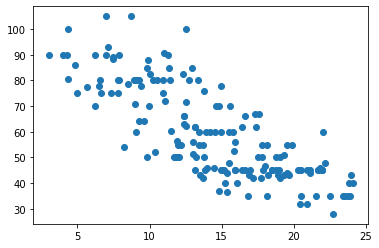

In [37]:
plt.scatter(A.index,A)
plt.show() #milage less fuel tank capacity is higesh

# Task9

In [39]:
A = Data[['Make','Central_Locking','Child_Safety_Locks','Hill_Assist','High_Speed_Alert_System','Passenger_Side_Seat-Belt_Reminder','Mileage']][(Data['Central_Locking']=='Yes') & (Data['Child_Safety_Locks']=='Yes') & (Data['Hill_Assist']=='Yes') & (Data['High_Speed_Alert_System']=='Yes') & (Data['Passenger_Side_Seat-Belt_Reminder']=='Yes') ]
A

,Make,Central_Locking,Child_Safety_Locks,Hill_Assist,High_Speed_Alert_System,Passenger_Side_Seat-Belt_Reminder,Mileage
271,Volvo,Yes,Yes,Yes,Yes,Yes,NaN
273,Audi,Yes,Yes,Yes,Yes,Yes,NaN
274,Audi,Yes,Yes,Yes,Yes,Yes,NaN
276,Jaguar,Yes,Yes,Yes,Yes,Yes,NaN
277,Jaguar,Yes,Yes,Yes,Yes,Yes,NaN
...,...,...,...,...,...,...,...
1250,Skoda,Yes,Yes,Yes,Yes,Yes,NaN
1251,NaN,Yes,Yes,Yes,Yes,Yes,NaN
1252,NaN,Yes,Yes,Yes,Yes,Yes,NaN
1253,Porsche,Yes,Yes,Yes,Yes,Yes,NaN


In [40]:
B= A[['Make','Mileage']].groupby('Make').max().head(10).dropna()
B

,Mileage
Make,
Bmw,14.98
Hyundai,13.85
Isuzu,8.80


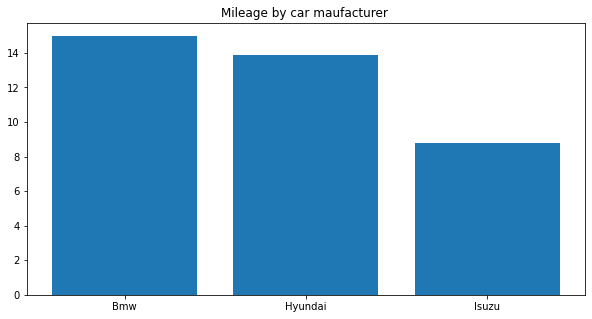

In [41]:
plt.figure(figsize=(10,5))
plt.bar(B.index, B['Mileage'])                                        # To plot the graph
plt.title("Mileage by car maufacturer ")
plt.show() 

# TASK10

In [61]:
X = Data[(Data['Drive_Modes']=='Normal, Comfort, Eco, Sport, Power Mode')]
X

,isker,Make,Model,Mileage,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
321,321,Audi,Q8,NaN,55 Tfsi Quattro Tiptronic,2995.0,4.0,4.0,AWD (All Wheel Drive),V,...,Yes,NaN,"Roller cam follower, continuous intake and exh...",Yes,Yes,NaN,Yes,Yes,NaN,NaN
330,330,Audi,A8 L,NaN,55 Tfsi Quattro,2995.0,8.0,4.0,AWD (All Wheel Drive),V,...,Yes,NaN,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN


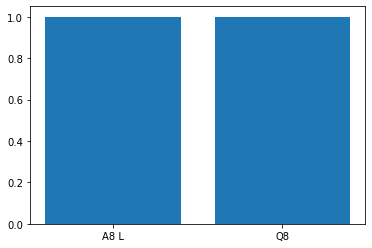

In [93]:
a = X.groupby('Model')['isker'].count()
plt.bar(a.index,a )
plt.show()

# TASK11

In [45]:
A=Data[['Make','Mileage']][(Data['Make']=='Hyundai')]
B=Data[['Make','Mileage']][(Data['Make']=='Maruti Suzuki')]
C=Data[['Make','Mileage']][(Data['Make']=='Tata')] 
D=Data[['Make','Mileage']][(Data['Make']=='Bmw')]


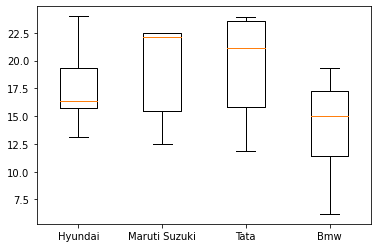

In [46]:
Lst = [A['Mileage'].dropna(), B['Mileage'].dropna(), C['Mileage'].dropna(), D['Mileage'].dropna()]
plt.boxplot(Lst, labels=['Hyundai', 'Maruti Suzuki', 'Tata','Bmw'])
plt.show()

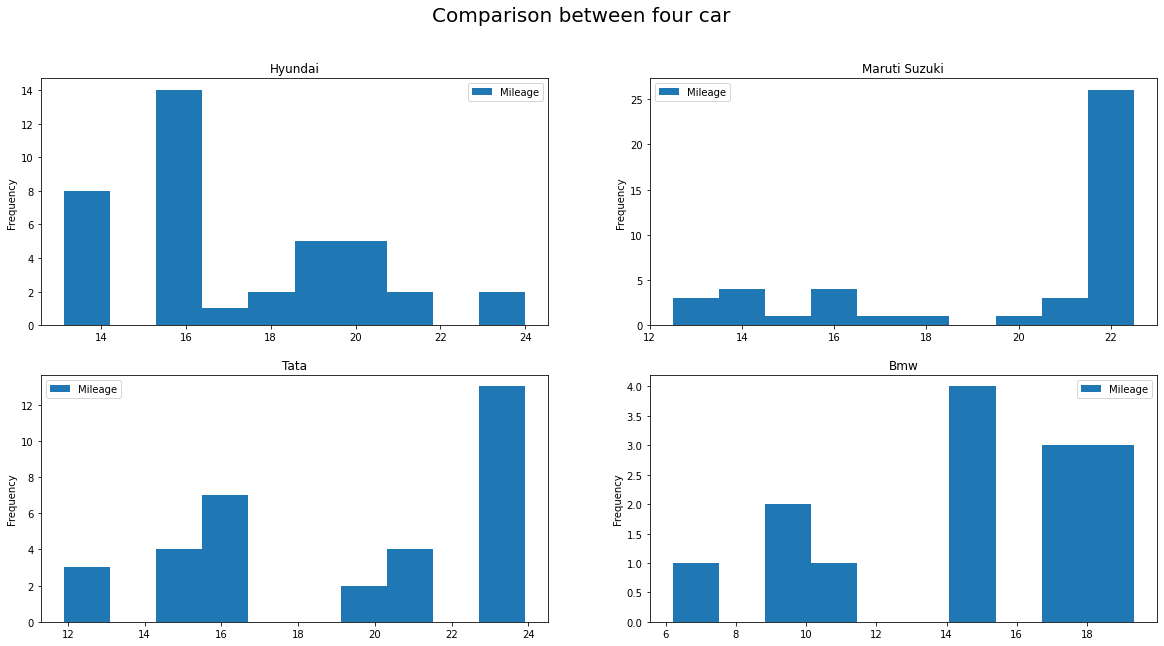

In [91]:
fig, ((ax1, ax2),(ax3, ax4))=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
fig.suptitle('Comparison between four car', fontsize=20 )
A.plot.hist(ax=ax1 ,title="Hyundai")
B.plot.hist(ax=ax2, title="Maruti Suzuki")
C.plot.hist(ax=ax3 , title="Tata")
D.plot.hist(ax=ax4 , title="Bmw")

plt.show()

In [59]:
Data.groupby(by=['Make','Model']).mean().sort_values(by='isker', ascending=False).head(30)

,,isker,Mileage,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Height_mm,Length_mm,Width_mm,Doors,City_Mileage_km_litre,Highway_Mileage_km_litre,Seating_Capacity,Boot_Space_litre,Minimum_Turning_Radius,Number_of_Airbags,USB_Ports
Make,Model,,,,,,,,,,,,,,,,,
Mitsubishi,Montero,1275.0,9.905000,3200.000000,4.000000,4.000000,88.000000,1900.000000,4900.00,1875.000000,5.00,8.250000,11.560000,7.0,105.000000,5.700000,6.000000,NaN
Honda,City,1269.5,19.020000,1497.400000,4.000000,4.000000,40.000000,1495.000000,4440.00,1695.000000,4.00,17.990000,20.050000,5.0,510.000000,5.300000,2.800000,NaN
Bentley,Flying Spur,1263.5,3.000000,4995.500000,10.000000,4.000000,90.000000,1488.000000,5299.00,2207.000000,4.00,2.000000,4.000000,4.0,475.000000,5.900000,6.000000,NaN
Mitsubishi,Pajero Sport,1260.0,8.500000,2477.000000,4.000000,3.200000,70.000000,1840.000000,4695.00,1815.000000,5.00,6.500000,10.500000,7.0,NaN,5.600000,2.000000,NaN
Mahindra,Verito,1256.0,19.040000,1461.000000,4.000000,3.333333,50.000000,1540.000000,4277.00,1740.000000,4.00,18.000000,20.080000,5.0,390.000000,5.250000,NaN,NaN
Porsche,Cayenne Coupe,1253.5,NaN,2995.000000,7.000000,4.000000,82.500000,1676.000000,4931.00,2194.000000,NaN,NaN,NaN,NaN,611.500000,NaN,10.000000,NaN
Skoda,Octavia,1244.5,NaN,1782.250000,4.000000,4.000000,50.000000,1476.000000,4670.00,1814.000000,4.00,NaN,15.000000,5.0,590.000000,5.200000,5.666667,NaN
Toyota,Yaris,1231.5,NaN,1496.428571,4.000000,4.000000,42.000000,1495.000000,4425.00,1730.000000,4.00,NaN,NaN,5.0,476.000000,5.100000,5.857143,NaN
Fiat,Punto Evo,1222.5,NaN,1210.000000,4.000000,4.000000,45.000000,1525.000000,3989.00,1687.000000,5.00,19.850000,NaN,5.0,280.000000,NaN,1.500000,NaN
